Instruction: This homework is not finalized. I will fill out this assignment with more code chunk. If you don't need additional code to help you finish the homework, you can work on it with yout own code now. 

1. Follow the example we did in class to construct a linear network to learn the prameter $w$ in the following code. You will see that $w$ here is the same as the class example, but the convergence speed is different. 

Compute the prediction, gradiant, loss and parameter update by pytorch.


In [8]:
import torch
import torch.nn as nn
# #Single variable regression by torch
#y=2*x
x=torch.tensor([0.1,0.2,0.3,0.4], dtype=torch.float32)
y=torch.tensor([0.2,0.4,0.6,0.8], dtype=torch.float32)
w=torch.tensor(0.0, dtype=torch.float32,requires_grad=True)
#model prediction
def forward(x):
    return w*x


2. Verify the Approximation Theorem II we proved in class. Construct a neural network in the theorem to approximate $x^2$ on $[-1,1]$. Let $\epsilon = 0.1$, build your training set wisely so the error is bounded by $\epsilon$.

You can revise the following code or come up with your own approach.

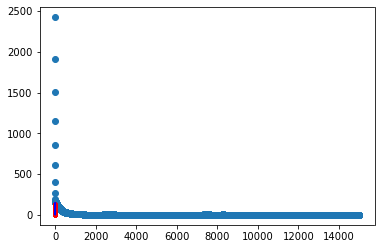

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

X = torch.tensor([range(-10,11)]).float().view(-1, 1)
Y = X*X

model = nn.Sequential(
    nn.Linear(1, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)
L_vec=[]
epoch_vec=[]
epoch=1
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_func = nn.MSELoss()
for _ in range(15000):
    optimizer.zero_grad()
    pred = model(X)
    loss = loss_func(pred, Y)
    loss.backward()
    optimizer.step()
    
    L_vec=L_vec+[loss.detach().numpy()]
    epoch_vec=epoch_vec+[epoch]
    epoch=epoch+1
plt.scatter(epoch_vec,L_vec)

x = torch.linspace(-12, 12, steps=200).view(-1, 1)
y = model(x)
f = x*x

plt.plot(x.detach().view(-1).numpy(), y.detach().view(-1).numpy(), 'r.', linestyle='None')
plt.plot(x.detach().view(-1).numpy(), f.detach().view(-1).numpy(), 'b')
plt.show()

In [9]:
# compute the max actual error
# Why is the eroor so large?
# How to revise the code and make the error bounded by epsilon?
print(max(abs(y-f)))

tensor([10.6931], grad_fn=<UnbindBackward0>)


3. Learn the house price of Boston with a deep (at least two hidden layer) neural network. 

Leave 25% of data as test data.

Use MSELoss for your loss function.

Construct a neural network with 40 nodes in the first layer, 20 nodes in the second layer, 10 nodes in the third layer, one node in output layer. Use Relu as the activation function of each layer.

Use sklearn.metrics.r2_score to evaluate the training accuracy and test accuracy. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [8]:
from sklearn.datasets import load_boston
import pandas as pd
dataset = load_boston()
df=pd.DataFrame(dataset.data)
df.columns=dataset.feature_names
df["Price"]=dataset.target 
#house price is in the last column, there might be a warning message
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
